In [4]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [10]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Create a grid of complex numbers on a smaller range
Y, X = np.mgrid[-0.8:0.8:0.002, -1.5:0.5:0.002]
x = torch.Tensor(X).to(device)
y = torch.Tensor(Y).to(device)
z = torch.complex(x, y)
zs = z.clone()
ns = torch.zeros_like(z, dtype=torch.float32)

In [11]:
# Mandelbrot Set computation
for i in range(200):
    zs_ = zs * zs + z
    not_diverged = torch.abs(zs_) < 4.0
    ns += not_diverged
    zs = zs_

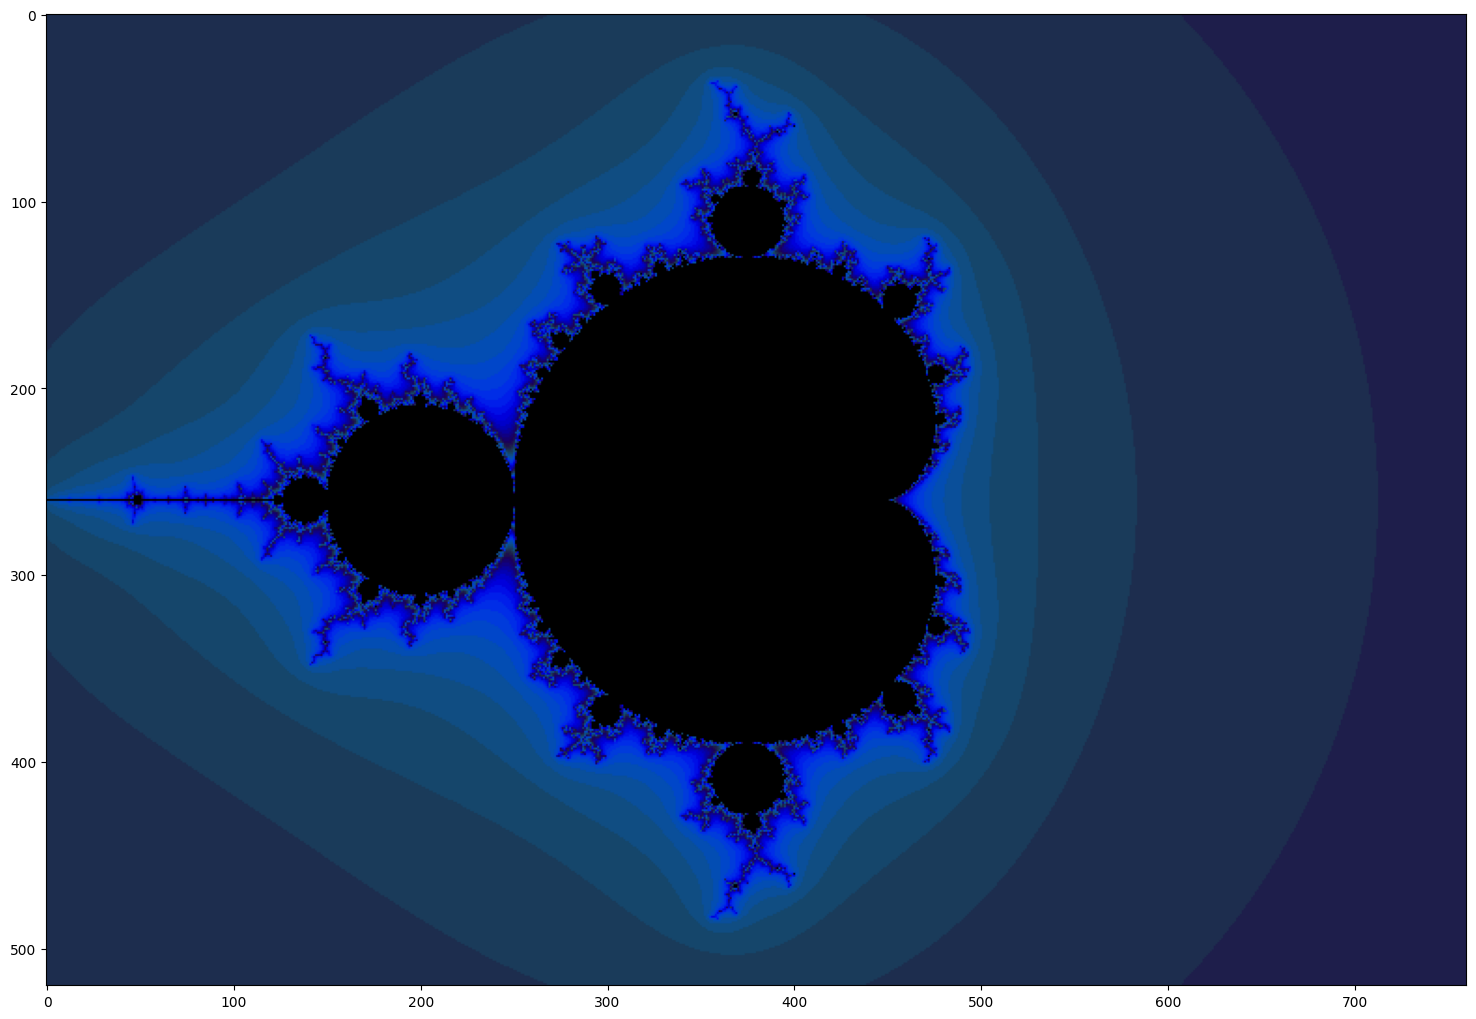

In [12]:
# Plot the Mandelbrot set
fig = plt.figure(figsize=(16, 10))
def processFractal(a):
    a_cyclic = (6.28 * a / 20.0).reshape(list(a.shape) + [1])
    img = np.concatenate([10 + 20 * np.cos(a_cyclic),
                          30 + 50 * np.sin(a_cyclic),
                          155 - 80 * np.cos(a_cyclic)], 2)
    img[a == a.max()] = 0
    a = img
    a = np.uint8(np.clip(a, 0, 255))
    return a

plt.imshow(processFractal(ns.cpu().numpy()))
plt.tight_layout(pad=0)
plt.show()

In [15]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [21]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


Y, X = np.mgrid[-1.5:1.5:0.005, -1.5:1.5:0.005]
x = torch.Tensor(X)
y = torch.Tensor(Y)
z = torch.complex(x, y)
zs = z.clone()
ns = torch.zeros_like(z)
c_real = torch.full_like(x, -0.8, device=device)
c_imag = torch.full_like(y, 0.156, device=device)
c = torch.complex(c_real, c_imag)
c = c.to(device)

In [22]:
# Julia Set computation
for i in range(200):
    zs_ = zs * zs + c
    not_diverged = torch.abs(zs_) < 4.0
    ns += not_diverged
    zs = zs_

C:\Users\47647\AppData\Local\Temp\ipykernel_18148\2434101273.py:10: ComplexWarning: Casting complex values to real discards the imaginary part
  a = np.uint8(np.clip(a, 0, 255))


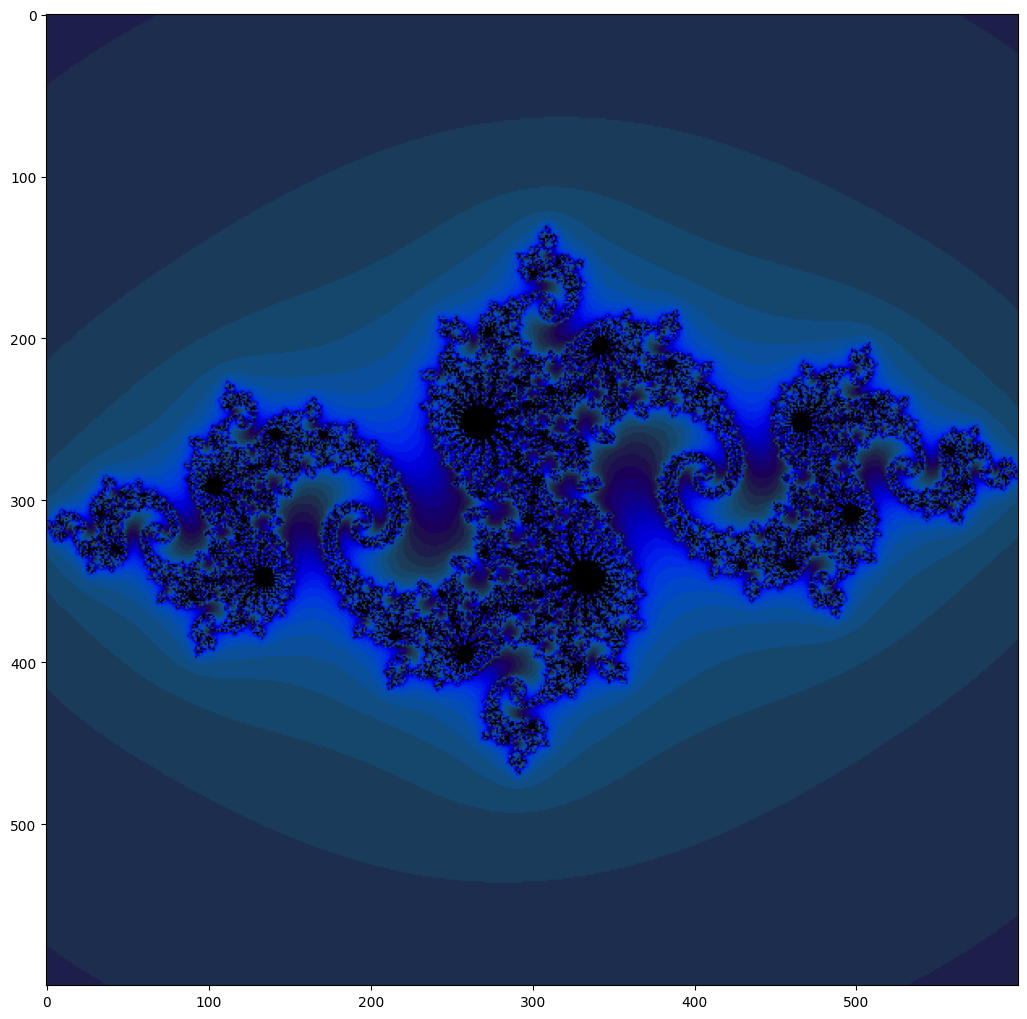

In [23]:
# Plot the Julia set
fig = plt.figure(figsize=(16, 10))
def processFractal(a):
    a_cyclic = (6.28 * a / 20.0).reshape(list(a.shape) + [1])
    img = np.concatenate([10 + 20 * np.cos(a_cyclic),
                          30 + 50 * np.sin(a_cyclic),
                          155 - 80 * np.cos(a_cyclic)], 2)
    img[a == a.max()] = 0
    a = img
    a = np.uint8(np.clip(a, 0, 255))
    return a

plt.imshow(processFractal(ns.cpu().numpy()))
plt.tight_layout(pad=0)
plt.show()